In [43]:
import pandas as pd
# Load the data
orders_df = pd.read_excel("ECOMM DATA.xlsx")

In [45]:
# Display the first few rows of the dataset
orders_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


Calculate Total Sales

In [46]:
# Compute total sales
total_sales = orders_df['Sales'].sum()
print(f'Total Sales: {total_sales}')
print(f"Total Sales: ${total_sales:,.2f}")

Total Sales: 12642501.909880001
Total Sales: $12,642,501.91


In [47]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

Analyzing Sales Trend Over Time

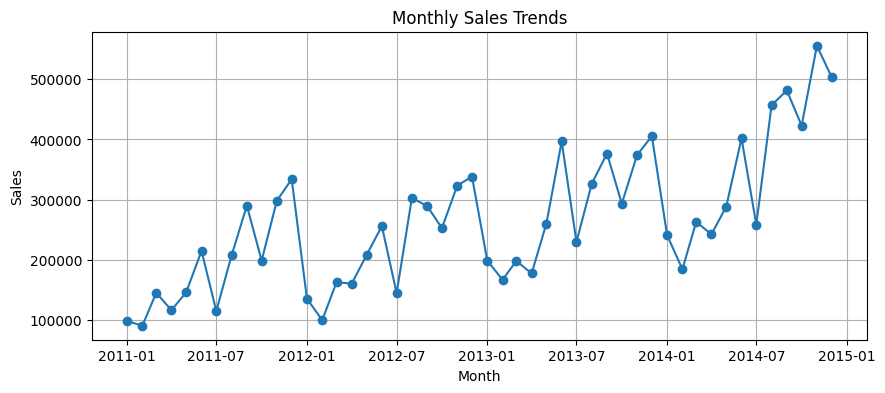

In [48]:
 #Analyze Sales Trends Over Time
orders_df['Order Date'] = pd.to_datetime(orders_df['Order Date'])
orders_df['YearMonth'] = orders_df['Order Date'].dt.to_period('M')
monthly_sales = orders_df.groupby('YearMonth')['Sales'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].dt.to_timestamp()
plt.figure(figsize=(10, 4))
plt.plot(monthly_sales['YearMonth'], monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

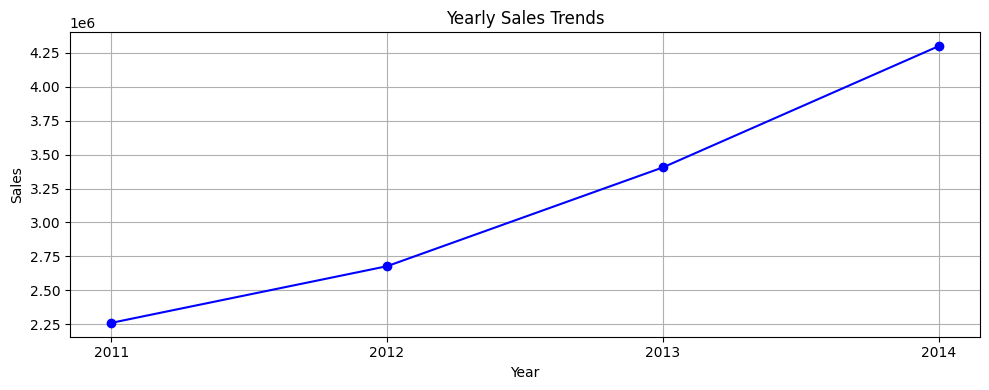

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
# Prepare the data
orders_df['Order Date'] = pd.to_datetime(orders_df['Order Date'])
orders_df['Year'] = orders_df['Order Date'].dt.year
yearly_sales = orders_df.groupby('Year')['Sales'].sum().reset_index()

# Visualize sales trends over time
plt.figure(figsize=(10, 4))
plt.plot(yearly_sales['Year'], yearly_sales['Sales'], marker='o', linestyle='-', color='b')
plt.title('Yearly Sales Trends')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(yearly_sales['Year'])  # Ensure that all years are shown on the x-axis
plt.tight_layout()
plt.show()


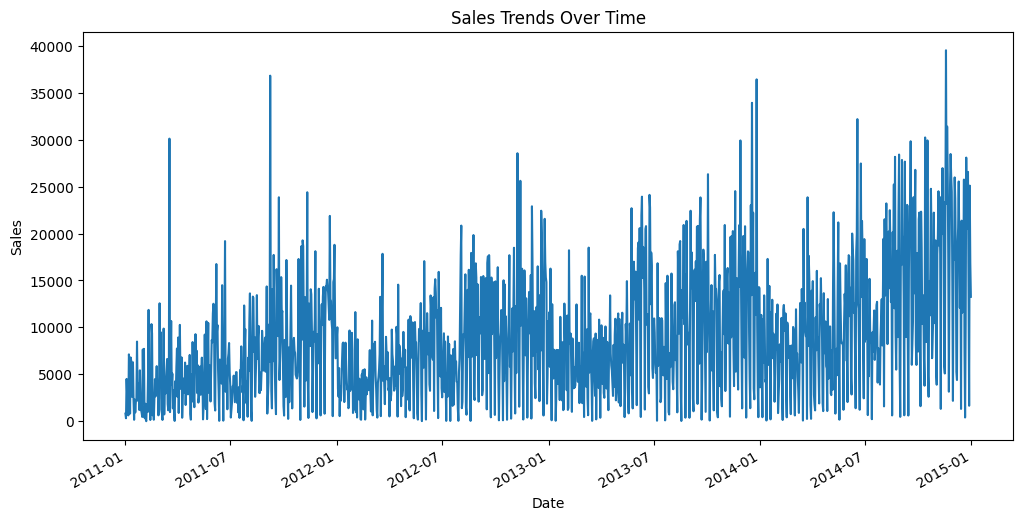

In [50]:
 #Group by date to analyze sales trends over time
sales_trend = orders_df.groupby('Order Date')['Sales'].sum()
# Plot sales trends over time
plt.figure(figsize=(12, 6))
sales_trend.plot(kind='line', title='Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

**Best-selling products**

<ipython-input-33-576daf04a7c5>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('viridis', 10)(range(10))


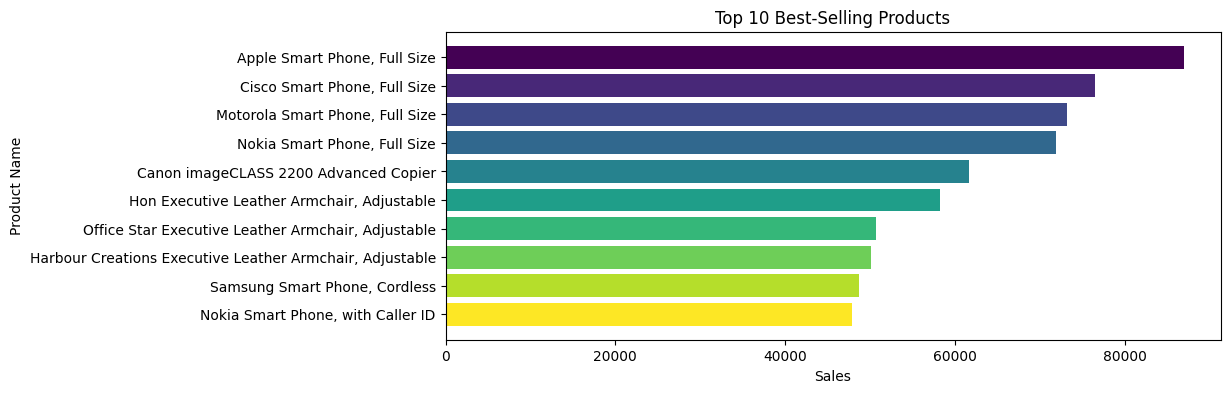

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# Prepare the data
product_sales = orders_df.groupby('Product Name')['Sales'].sum().reset_index()
best_selling_products = product_sales.sort_values(by='Sales', ascending=False).head(10)
# Create a colormap
colors = cm.get_cmap('viridis', 10)(range(10))
# Plot the best-selling products
plt.figure(figsize=(10, 4))
plt.barh(best_selling_products['Product Name'], best_selling_products['Sales'], color=colors)
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Sales')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()
plt.show()

Additional Visualizations

Sales By Category

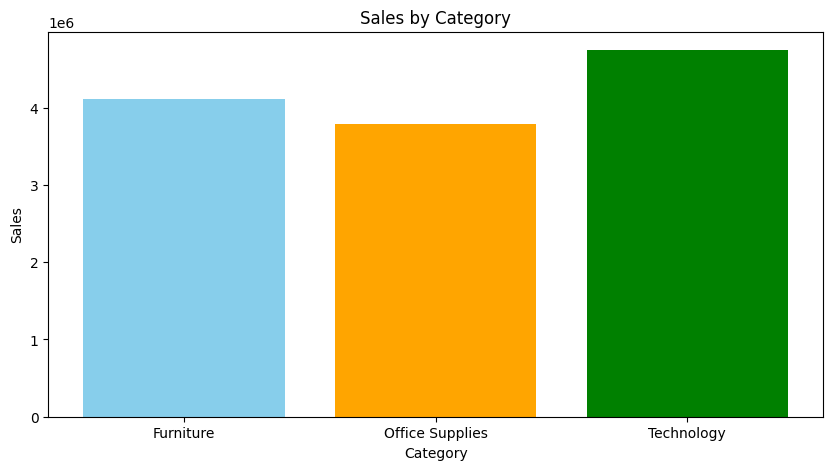

In [34]:
# Sales by Category
category_sales = orders_df.groupby('Category')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 5))
plt.bar(category_sales['Category'], category_sales['Sales'], color=['skyblue', 'orange', 'green'])
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

Sales By Segment

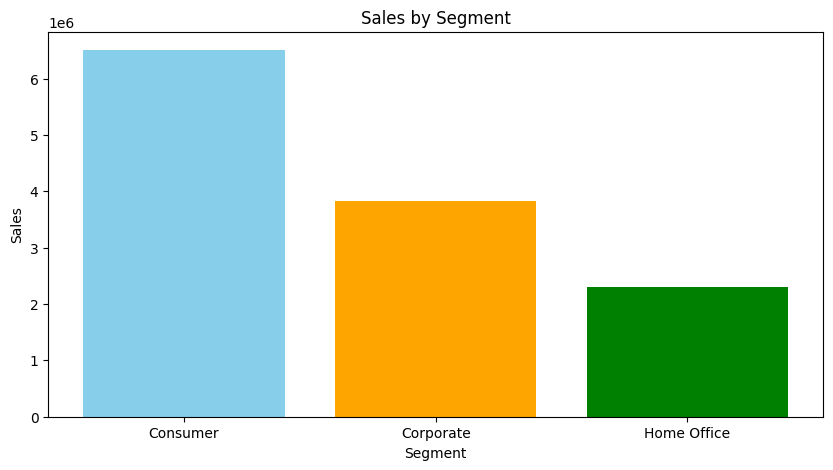

In [35]:
# Sales by Segment
segment_sales = orders_df.groupby('Segment')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 5))
plt.bar(segment_sales['Segment'], segment_sales['Sales'], color=['skyblue', 'orange', 'green'])
plt.title('Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.show()

Return Distibution By Market Wise

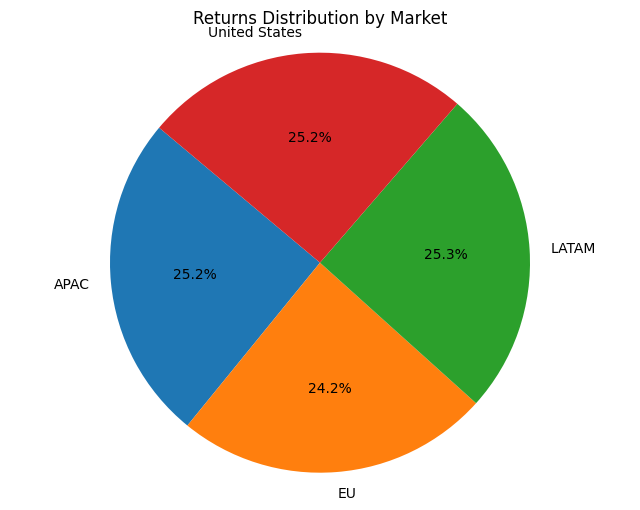

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file specifying the sheet name
df = pd.read_excel('ECOMM DATA.xlsx', sheet_name='Returns')
# Group by 'Market' and count the number of returns in each market
market_returns = df[df['Returned'] == 'Yes'].groupby('Market').size()
# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(market_returns, labels=market_returns.index, autopct='%1.1f%%', startangle=140)
plt.title('Returns Distribution by Market')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
